In [1]:
import numpy as np
import itertools
import random

In [2]:
from functions.utils import load_graph_json
from functions.graph_functions import create_counters, add_bin, find_closest_edge, insert_bin_into_edge, generate_random_bin_coords, get_depot_info, plan_truck_routes

In [3]:
#Load map graph
nodes, edges, street_graph = load_graph_json("knowledge_base/graph_data.json")

In [4]:
comuna = 5

In [5]:
#Create bins for testing purposes
bins = generate_random_bin_coords(neighborhood = comuna, edges = edges, nodes = nodes,num_bins=30, min_id = 20000)

In [6]:
bins

[{'id': 20000,
  'coord': (-58.429787076564466, -34.60009245138734),
  'neighborhood': 5},
 {'id': 20001,
  'coord': (-58.41898264986392, -34.63052013615676),
  'neighborhood': 5},
 {'id': 20002,
  'coord': (-58.41448463041064, -34.63202416608776),
  'neighborhood': 5},
 {'id': 20003,
  'coord': (-58.418821260818575, -34.62832724520806),
  'neighborhood': 5},
 {'id': 20004,
  'coord': (-58.41577868753092, -34.61562108269985),
  'neighborhood': 5},
 {'id': 20005,
  'coord': (-58.41873652839976, -34.60897130961666),
  'neighborhood': 5},
 {'id': 20006,
  'coord': (-58.4156517588183, -34.632667520912904),
  'neighborhood': 5},
 {'id': 20007,
  'coord': (-58.41432069891985, -34.60292792659952),
  'neighborhood': 5},
 {'id': 20008,
  'coord': (-58.42311576779968, -34.62530466381252),
  'neighborhood': 5},
 {'id': 20009,
  'coord': (-58.41946793354813, -34.63840367402619),
  'neighborhood': 5},
 {'id': 20010,
  'coord': (-58.413133726201835, -34.63003457772948),
  'neighborhood': 5},
 {'id':

In [7]:
edge_id_counter = itertools.count(max(edges.keys()) + 1 if edges else 1)
for bin_data in bins:
    bin_id = bin_data["id"]
    pos = bin_data["coord"]

    add_bin(bin_id, pos, nodes, edges, street_graph,
            edge_id_counter, max_distance=20, priority= random.randint(1, 10))
    
    print("Nuevo bin agregado con ID:", bin_id , " in pos:", pos)

Nuevo bin agregado con ID: 20000  in pos: (-58.429787076564466, -34.60009245138734)
Nuevo bin agregado con ID: 20001  in pos: (-58.41898264986392, -34.63052013615676)
Nuevo bin agregado con ID: 20002  in pos: (-58.41448463041064, -34.63202416608776)
Nuevo bin agregado con ID: 20003  in pos: (-58.418821260818575, -34.62832724520806)
Nuevo bin agregado con ID: 20004  in pos: (-58.41577868753092, -34.61562108269985)
Nuevo bin agregado con ID: 20005  in pos: (-58.41873652839976, -34.60897130961666)
Nuevo bin agregado con ID: 20006  in pos: (-58.4156517588183, -34.632667520912904)
Nuevo bin agregado con ID: 20007  in pos: (-58.41432069891985, -34.60292792659952)
Nuevo bin agregado con ID: 20008  in pos: (-58.42311576779968, -34.62530466381252)
Nuevo bin agregado con ID: 20009  in pos: (-58.41946793354813, -34.63840367402619)
Nuevo bin agregado con ID: 20010  in pos: (-58.413133726201835, -34.63003457772948)
Nuevo bin agregado con ID: 20011  in pos: (-58.41926181790498, -34.63656455021834)
N

In [8]:
intersection_ids = set()
for edge_id, data in edges.items():
    neigh = data.get('neighborhood', np.nan)
    if np.isnan(neigh):
        continue
    if int(neigh) != comuna:
        continue

    u, v = data['u'], data['v']
    if nodes[u].get('type') == 'intersection':
        intersection_ids.add(u)
    if nodes[v].get('type') == 'intersection':
        intersection_ids.add(v)

# imprimir resultados (uno por línea)
if not intersection_ids:
    print(f"No intersections found in neighborhood {comuna}")
else:
    for nid in sorted(intersection_ids):
        print(nid)


701
702
5048
5049
5054
5059
5066
5071
5072
5076
5078
5079
5088
5122
5149
5158
5215
5217
5223
5237
5245
5251
5257
5259
5269
5271
5274
5281
5292
5299
5301
5312
5330
5337
5338
5360
5362
5364
5371
5383
5393
5406
5409
5423
5440
5467
5485
5503
5510
5532
5537
5560
5562
5582
5603
5605
5623
5624
5653
5656
5674
5694
5699
5700
5709
5718
5723
5739
5764
5765
5776
5782
5793
5805
5826
5837
5855
5885
5894
5905
5917
5922
5942
5947
5972
5988
5991
5994
5998
5999
6014
6016
6023
6035
6043
6063
6069
6099
6101
6114
6118
6122
6131
6137
6149
6150
6154
6177
6210
6235
6240
6252
6265
6266
6267
6269
6276
6279
6280
6294
6372
6374
6388
6397
6408
6415
6431
6432
6441
6442
6443
6444
6446
6448
6449
6451
6457
6581
6606
6620
6621
6622
6629
6630
6636
6641
6644
6650
6651
6655
6659
6762
6779
6790
6803
6815
6824
6836
6848
6858
6873
6907
6938
6940
6969
6973
6990
6993
7003
7011
7013
7019
7031
7032
7033
7043
7064
7067
7084
7095
7105
7106
7112
7155
7161
7189
7195
7200
7212
7226
7256
7269
7271
7274
7275
7288
7302
7329
7344
7351
73

In [9]:
depot_id = 5330

In [10]:
depot = get_depot_info(
    depot_id=depot_id,
    comuna=comuna,
    nodes=nodes,
    edges=edges
)

Selected depot node ID: 5330, coordinates: [-58.4301519, -34.59977]


In [11]:
routes, distance_matrix, path_matrix = plan_truck_routes(nodes = nodes, street_graph = street_graph, edges = edges, num_trucks = 5, depot_id = depot_id, balance_factor=5.0)

In [12]:
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors as mcolors
import random
import heapq
import numpy as np

def get_route_path(u, v, street_graph, edges, nodes):
    """
    Returns a list of coordinates along the shortest path from u to v.
    Uses Dijkstra to get the path in node IDs.
    """
    prev = {u: None}
    dist = {u: 0}
    pq = [(0, u)]
    
    while pq:
        d_curr, node = heapq.heappop(pq)
        if node == v:
            break
        for neighbor, edge_id in street_graph.get(node, []):
            edge_distance = edges[edge_id].get("distance", 1)
            alt = d_curr + edge_distance
            if neighbor not in dist or alt < dist[neighbor]:
                dist[neighbor] = alt
                prev[neighbor] = node
                heapq.heappush(pq, (alt, neighbor))
    
    # Reconstruct path
    path = []
    current = v
    while current is not None:
        path.append(current)
        current = prev.get(current)
    path = path[::-1]
    
    coords = [nodes[n]['coord'] for n in path]
    return coords

def generate_random_colors(n):
    """
    Generate n distinct bright colors, random each run.
    """
    colors = []
    for _ in range(n):
        h = random.random()
        s = 0.8 + 0.2 * random.random()
        v = 0.8 + 0.2 * random.random()
        rgb = mcolors.hsv_to_rgb((h, s, v))
        colors.append(mcolors.to_hex(rgb))
    return colors

def plot_neighborhood_routes(nodes, edges, street_graph, routes, depot_id, target_neighborhood):
    """
    Plots streets, bins, depot, and truck routes for a specific neighborhood.
    Shows the visit order of each bin (per truck) as a number.
    """
    # Colors and sizes
    street_color = '#1f77b4'
    bin_color = '#ff7f0e'
    bin_marker_size = 200
    depot_color = '#2ca02c'
    depot_marker_size = 200
    route_linewidth = 4
    
    # Generate truck colors dynamically
    truck_colors = generate_random_colors(len(routes))
    
    edges_to_plot = set()
    for u_id, neighbors in street_graph.items():
        for v_id, edge_id in neighbors:
            neigh = edges[edge_id].get('neighborhood')
            if not np.isnan(neigh) and int(neigh) == target_neighborhood:
                edges_to_plot.add((u_id, v_id))
    
    # Separate street nodes and bin nodes
    street_nodes = set()
    bin_nodes = set()
    for u_id, v_id in edges_to_plot:
        for node_id in (u_id, v_id):
            if nodes[node_id]['type'] == 'bin':
                bin_nodes.add(node_id)
            else:
                street_nodes.add(node_id)
    
    fig, ax = plt.subplots(figsize=(12,12))
    
    # Plot streets
    for u_id, v_id in edges_to_plot:
        u_coord = nodes[u_id]['coord']
        v_coord = nodes[v_id]['coord']
        ax.plot([u_coord[0], v_coord[0]], [u_coord[1], v_coord[1]],
                color=street_color, alpha=0.7, linewidth=1)
    
    # Plot street nodes
    if street_nodes:
        x_street, y_street = zip(*[nodes[n]['coord'] for n in street_nodes])
        ax.scatter(x_street, y_street, s=20, color=street_color)
    
    # Plot bins
    if bin_nodes:
        x_bins, y_bins = zip(*[nodes[n]['coord'] for n in bin_nodes])
        ax.scatter(x_bins, y_bins, s=bin_marker_size, color=bin_color,
                   marker='o', edgecolors='black', zorder=5)
    
    # Annotate bins with visit order per truck
    for t_idx, route in enumerate(routes):
        visit_num = 1
        for node_id in route:
            if node_id == depot_id:
                continue  # skip depot
            if nodes[node_id]['type'] == 'bin':
                x, y = nodes[node_id]['coord']
                ax.text(x, y, str(visit_num),
                        fontsize=12, fontweight="bold",
                        color=truck_colors[t_idx],  # match truck color
                        ha="center", va="center", zorder=7)
                visit_num += 1
    
    # Plot depot
    depot_coord = nodes[depot_id]['coord']
    ax.scatter(depot_coord[0], depot_coord[1], s=depot_marker_size,
               color=depot_color, marker='o', edgecolors='black', zorder=6)
    
    # Plot truck routes along streets
    for t_idx, route in enumerate(routes):
        color = truck_colors[t_idx % len(truck_colors)]
        for i in range(len(route)-1):
            u, v = route[i], route[i+1]
            path_coords = get_route_path(u, v, street_graph, edges, nodes)
            xs, ys = zip(*path_coords)
            ax.plot(xs, ys, color=color, linewidth=route_linewidth,
                    alpha=0.9, zorder=4)
    
    # Add basemap
    ctx.add_basemap(ax, crs="EPSG:4326")
    ax.set_axis_off()
    plt.show()


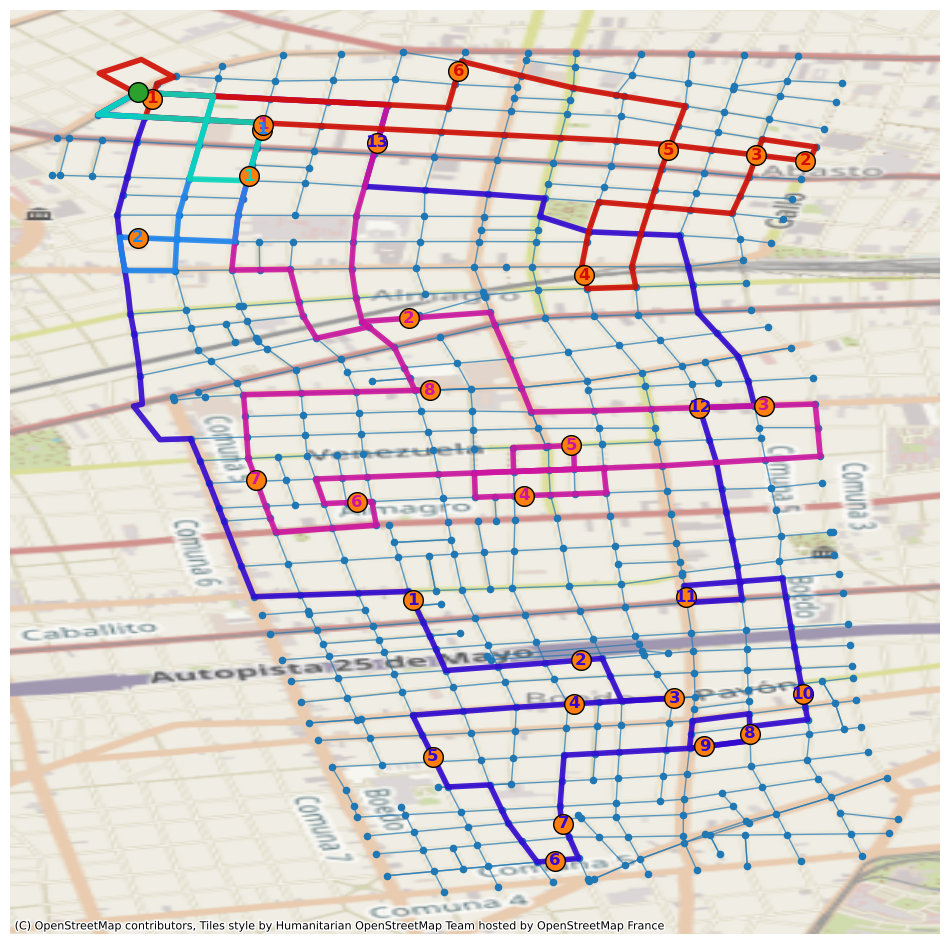

In [13]:
plot_neighborhood_routes(nodes, edges, street_graph, routes, depot_id, target_neighborhood=comuna)